# Univariate Investment Risk and Returns


In [101]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt



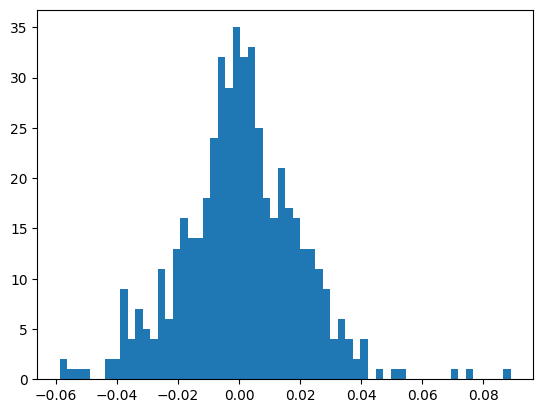

In [102]:
AAPL = yf.Ticker("AAPL")
history = AAPL.history(period="501d")
# print(history.shape)
temp_df = history.Close.copy()
# print(temp_df)

history["returns"] = temp_df.pct_change()
# print(history)

history = history.dropna()



percent_return = history['returns']
# print(type(percent_return))
percent_return = percent_return.sort_values()
# print(percent_return.index)
# print(percent_return)





# plt.plot(percent_return,percent_return.index)
# plt.show()



# percent_return.sort_values(by=['returns'])
# print(percent_return)

# Drop the missing values
# returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(percent_return, bins=60,density=False)
plt.show()


# history.to_csv('data.csv')


## Get the stock data


In [103]:
today = dt.date.today()
One_hundred_day_before = today - dt.timedelta(days=500)

# print(today)
# print(One_hundred_day_before)

StockPrices = yf.download("AAPL",One_hundred_day_before,today)
print(StockPrices)





[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2021-07-14 00:00:00-04:00  148.100006  149.570007  147.679993  149.149994   
2021-07-15 00:00:00-04:00  149.240005  150.000000  147.089996  148.479996   
2021-07-16 00:00:00-04:00  148.460007  149.759995  145.880005  146.389999   
2021-07-19 00:00:00-04:00  143.750000  144.070007  141.669998  142.449997   
2021-07-20 00:00:00-04:00  143.460007  147.100006  142.960007  146.149994   
...                               ...         ...         ...         ...   
2022-11-18 00:00:00-05:00  152.309998  152.699997  149.970001  151.289993   
2022-11-21 00:00:00-05:00  150.160004  150.369995  147.720001  148.009995   
2022-11-22 00:00:00-05:00  148.130005  150.419998  146.929993  150.179993   
2022-11-23 00:00:00-05:00  149.449997  151.830002  149.339996  151.070007   
2022-11

## Calculating stock Returns 

In [104]:
StockPrices_close_price = StockPrices["Close"]

StockPrices["Returns"] =StockPrices_close_price.pct_change() 


print("Print Returns")
print(StockPrices.tail())

# Drop the Nan
print("drop NaN")
StockPrices = StockPrices.dropna()
print(StockPrices.tail())




Print Returns
                                 Open        High         Low       Close  \
Date                                                                        
2022-11-18 00:00:00-05:00  152.309998  152.699997  149.970001  151.289993   
2022-11-21 00:00:00-05:00  150.160004  150.369995  147.720001  148.009995   
2022-11-22 00:00:00-05:00  148.130005  150.419998  146.929993  150.179993   
2022-11-23 00:00:00-05:00  149.449997  151.830002  149.339996  151.070007   
2022-11-25 00:00:00-05:00  148.309998  148.880005  147.119995  148.110001   

                            Adj Close    Volume   Returns  
Date                                                       
2022-11-18 00:00:00-05:00  151.289993  74794600  0.003782  
2022-11-21 00:00:00-05:00  148.009995  58724100 -0.021680  
2022-11-22 00:00:00-05:00  150.179993  51804100  0.014661  
2022-11-23 00:00:00-05:00  151.070007  58301400  0.005926  
2022-11-25 00:00:00-05:00  148.110001  35195900 -0.019594  
drop NaN
                 

# Plot the return graph

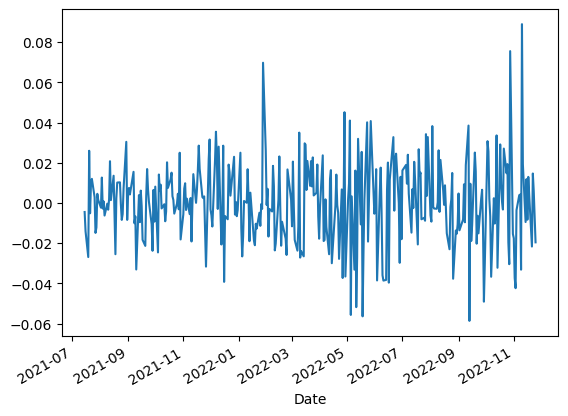

In [105]:
StockPrices["Returns"].plot()

plt.show()

## Return distributions

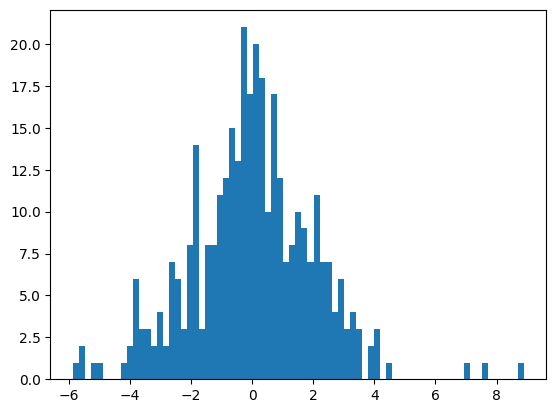

In [106]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75,density=False)
plt.show()

# Moments of distributions

## Probability distributions have the following moments:

1) Mean 
2) Variance (a”)
3) Skewness
4) Kurtosis

# Calculating mean returns

In [107]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(f'mean_return_daily : {mean_return_daily}')

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(f'mean_return_annualized : {mean_return_annualized}')

mean_return_daily : 0.00018124472379186856
mean_return_annualized : 0.046728443371456985


## Calculating Standard deviation and variance

In [108]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(f'sigma_daily : {sigma_daily}')

# Calculate the daily variance
variance_daily = sigma_daily**2
print(f'variance_daily : {variance_daily}')

# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(f'sigma_annualized : {sigma_annualized}')

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(f'variance_annualized : {variance_annualized}')


sigma_daily : 0.020094379020465448
variance_daily : 0.00040378406821812193
sigma_annualized : 0.31898837783055156
variance_annualized : 0.10175358519096672


# Calculating Skewness

A normal distribution would have a skewness much closer to 0.

In [109]:
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices["Returns"].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(f'returns_skewness : {returns_skewness}')

returns_skewness : 0.20232906295250036


## Calculating Kurtosis

A normal distribution would tend to have a kurtosis of 3, and an excess kurtosis of 0.

from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(f'excess_kurtosis : {excess_kurtosis}')

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis+3
print(f'fourth_moment : {fourth_moment}')

## Testing for normality

The null hypothesis of the Shapiro-Wilk test is that the data are normally distributed.

If the p-value is less than 0.05, the null hypothesis is rejected because the data are most likely non-normal.

In [110]:
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9822931885719299, pvalue=0.0002935370139311999)
P-value:  0.0002935370139311999


# Portfolio Investing


## Calculating portfolio returns



In [111]:
# Getting data

UK_STOCK_LIST = ["CUKX.L", "ISF.L", "IUSA.L", "IWRD.L","SWDA.L", "IWDP.L", "VMIG.L", "VMID.L", "VUSA.L"]

# US_STOCK_LIST = ["JETS", "VTI", "VTV", "VT", "VGT", "VOO", "TSM", "ITA"]

US_STOCK_LIST = ["TSM","GOOGL","TSLA","MSFT","AAPL"]


def list_to_string_with_space(list):
    my_str = ' '.join(list)

    return(my_str)

UK_ticket_list = list_to_string_with_space(UK_STOCK_LIST)
# print(UK_ticket)

US_ticket_list = list_to_string_with_space(US_STOCK_LIST)


# US_tickers = yf.Tickers(US_ticket_list)
UK_tickers = yf.Tickers(UK_ticket_list)


def create_stock_object(stock_list):
    stock_list_str = list_to_string_with_space(stock_list)
    tickers = yf.Tickers(stock_list)

    return tickers

US_tickers = create_stock_object(US_STOCK_LIST)

print(US_tickers)





yfinance.Tickers object <TSM,GOOGL,TSLA,MSFT,AAPL>


In [112]:
print(US_tickers)


def Calculating_returns_from_tickets_object(ticket:str,period:str) :

    closing_price_df = US_tickers.tickers[ticket].history(period=period)[["Close"]].copy()
    closing_price_df["Returns"] = closing_price_df['Close'].pct_change() 
    closing_price_df = closing_price_df.dropna() 

    return closing_price_df

StockReturns = None

def create_StockReturns_dataframe(stock_list):

    for ticket_symbol in stock_list:
        # print(ticket_symbol)
        closing_price_df = Calculating_returns_from_tickets_object(ticket_symbol,"501d")
        # print(closing_price_df.head())

        
        if ticket_symbol == stock_list[0]:
            StockReturns = closing_price_df[['Returns']].copy()
            StockReturns = StockReturns.rename({'Returns':ticket_symbol}, axis='columns') 

            # print("print 1st stock returns")
            # print(StockReturns.head())
        
        else:
            # print(ticket_symbol)
            single_stock_return = closing_price_df["Returns"]
            # print(single_stock_return.head())

            # StockReturns = StockReturns.join(single_stock_return) 
            StockReturns = pd.concat([StockReturns,single_stock_return],axis=1)        
            StockReturns = StockReturns.rename({'Returns':ticket_symbol}, axis='columns') 

    return StockReturns


# print(StockReturns.head())
StockReturns = create_StockReturns_dataframe(US_STOCK_LIST)

print(StockReturns.head())




yfinance.Tickers object <TSM,GOOGL,TSLA,MSFT,AAPL>
                                TSM     GOOGL      TSLA      MSFT      AAPL
Date                                                                       
2020-12-02 00:00:00-05:00 -0.013087  0.016493 -0.027259 -0.003885  0.002933
2020-12-03 00:00:00-05:00 -0.000402 -0.001715  0.043177 -0.005247 -0.001138
2020-12-04 00:00:00-05:00  0.042513  0.001054  0.009539  0.000560 -0.005613
2020-12-07 00:00:00-05:00  0.025644 -0.003690  0.071314 -0.000327  0.012270
2020-12-08 00:00:00-05:00 -0.007050 -0.003137  0.012653  0.008026  0.005091


                                TSM     GOOGL      TSLA      MSFT      AAPL
Date                                                                       
2020-12-02 00:00:00-05:00 -0.002617  0.002474 -0.004089 -0.001166  0.000293
2020-12-03 00:00:00-05:00 -0.000080 -0.000257  0.006477 -0.001574 -0.000114
2020-12-04 00:00:00-05:00  0.008503  0.000158  0.001431  0.000168 -0.000561
2020-12-07 00:00:00-05:00  0.005129 -0.000554  0.010697 -0.000098  0.001227
2020-12-08 00:00:00-05:00 -0.001410 -0.000471  0.001898  0.002408  0.000509
...                             ...       ...       ...       ...       ...
2022-11-18 00:00:00-05:00  0.001939 -0.001418 -0.002440 -0.000571  0.000378
2022-11-21 00:00:00-05:00 -0.005689 -0.002817 -0.010256  0.001032 -0.002168
2022-11-22 00:00:00-05:00  0.006531  0.002275  0.001823  0.003693  0.001466
2022-11-23 00:00:00-05:00 -0.001381  0.002179  0.011733  0.003122  0.000593
2022-11-25 00:00:00-05:00 -0.001391 -0.001523 -0.000278 -0.000109 -0.001959

[500 rows x

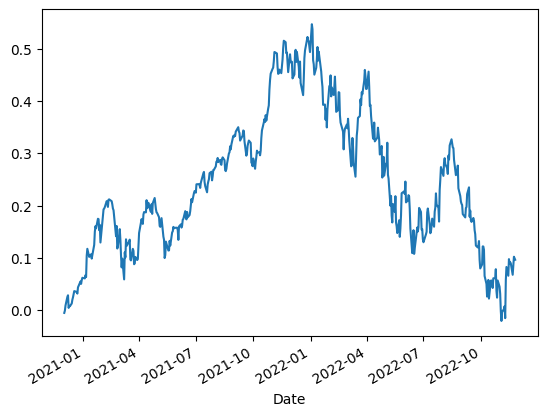

In [113]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.2,0.15,0.15,0.3,0.1])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

print(WeightedReturns)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

print(StockReturns.head())

# Plot the cumulative portfolio returns over time


def cumulative_returns_plot(cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1) 
    CumulativeReturns.plot() 
    plt.show()

cumulative_returns_plot('Portfolio')

# CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
# CumulativeReturns.plot()
# plt.show()

## Equal weighted portfolios

When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

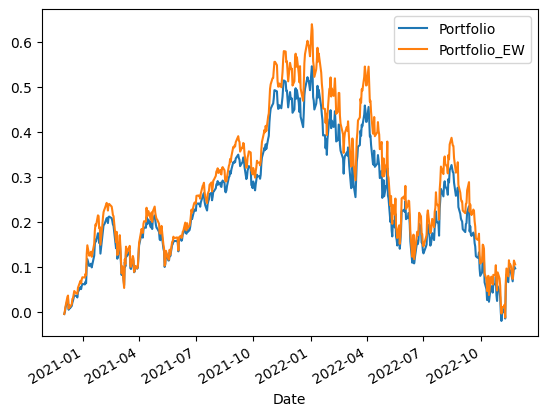

In [114]:
# How many stocks are in your portfolio?
numstocks = len(US_STOCK_LIST)

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks,numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

## Market-cap weighted portfolios


In [115]:
# Getting market cap of each stock

def getting_market_cap(Stock_list:list):
    
    for ticket in Stock_list:
        print(ticket)
        marketCap = print(US_tickers.tickers[ticket].info['marketCap'])
    
    return marketCap 

# print(getting_market_cap(UK_STOCK_LIST))



In [116]:

# Create an array of market capitalizations (in billions)
# market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
# mcap_weights = market_capitalizations/sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
# StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
# cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])



## The correlation matrix


In [117]:
print(StockReturns.head())
StockReturns = StockReturns.drop('Portfolio',axis=1)
StockReturns = StockReturns.drop('Portfolio_EW',axis=1)

print('StockReturns without Portfolio and Portfolio')
print(StockReturns.head())

# Calculate the correlation matrix
correlation_matrix = StockReturns.corr()

# Print the correlation matrix
print(correlation_matrix)

                                TSM     GOOGL      TSLA      MSFT      AAPL  \
Date                                                                          
2020-12-02 00:00:00-05:00 -0.013087  0.016493 -0.027259 -0.003885  0.002933   
2020-12-03 00:00:00-05:00 -0.000402 -0.001715  0.043177 -0.005247 -0.001138   
2020-12-04 00:00:00-05:00  0.042513  0.001054  0.009539  0.000560 -0.005613   
2020-12-07 00:00:00-05:00  0.025644 -0.003690  0.071314 -0.000327  0.012270   
2020-12-08 00:00:00-05:00 -0.007050 -0.003137  0.012653  0.008026  0.005091   

                           Portfolio  Portfolio_EW  
Date                                                
2020-12-02 00:00:00-05:00  -0.005105     -0.004961  
2020-12-03 00:00:00-05:00   0.004451      0.006935  
2020-12-04 00:00:00-05:00   0.009698      0.009611  
2020-12-07 00:00:00-05:00   0.016401      0.021042  
2020-12-08 00:00:00-05:00   0.002934      0.003117  
StockReturns without Portfolio and Portfolio
                              

## The correlation matrix

The correlation matrix is very useful for a variety of quantitative investment analysis methods.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

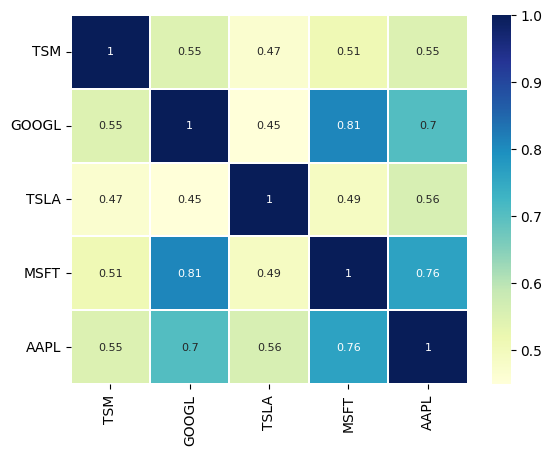

In [118]:
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

## The co-variance matrix

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

In [119]:
# Calculate the covariance matrix
cov_mat = StockReturns.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

            TSM     GOOGL      TSLA      MSFT      AAPL
TSM    0.133903  0.063544  0.102882  0.053538  0.061465
GOOGL  0.063544  0.101050  0.085884  0.073206  0.068491
TSLA   0.102882  0.085884  0.362822  0.083716  0.102701
MSFT   0.053538  0.073206  0.083716  0.081341  0.066397
AAPL   0.061465  0.068491  0.102701  0.066397  0.093497


## Portfolio standard deviation

![](images/Portfolio_standard_deviation_images.png)


In [120]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.2646221396561466


## Find the Volatility for each stock

In [121]:
import pprint
# print(US_STOCK_LIST)

# print(US_tickers.tickers["TSM"].history(period="1mo").head())

# TSM = US_tickers.tickers["TSM"].history(period="1mo")

# closing_price = TSM["Close"]

# print(closing_price.head())

# print(closing_price.mean())


## find the Sharpe ratios

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

![](images/Sharpe_ratios.png)

In [122]:

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  

# # Risk free rate
# risk_free = 0

# # Calculate the Sharpe Ratio for each asset
# RandomPortfolios['Sharpe'] = (RandomPortfolios["Returns"] - risk_free)/RandomPortfolios["Volatility"]

# # Print the range of Sharpe ratios
# print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  



## The MSR portfolio

The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

In [123]:
# # Sort the portfolios by Sharpe ratio
# sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# # Extract the corresponding weights
# MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# # Cast the MSR weights as a numpy array
# MSR_weights_array = np.array(MSR_weights)

# # Calculate the MSR portfolio returns
# StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# # Plot the cumulative returns
# cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

## The GMV portfolio

The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.



In [124]:
# # Sort the portfolios by volatility
# sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# # Extract the corresponding weights
# GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# # Cast the GMV weights as a numpy array
# GMV_weights_array = np.array(GMV_weights)

# # Calculate the GMV portfolio returns
# StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# # Plot the cumulative returns
# cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

# Factor Investing

Learn about the main factors that influence the returns of your portfolios and how to quantify your portfolio's exposure to these factors.

## Excess returns

In order to perform a robust analysis on your portfolio returns, you must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the Excess Portfolio Return.

In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.

In [125]:
# print(FamaFrenchData.head())

# # Calculate excess portfolio returns
# FamaFrenchData['Portfolio_Excess'] = FamaFrenchData["Portfolio"] - FamaFrenchData["RF"]

# # Plot returns vs excess returns
# CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
# CumulativeReturns.plot()
# plt.show()

## Calculating beta using co-variance

Beta is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.

Historical beta can be estimated in a number of ways. In this exercise, you will use the following simple formula involving co-variance and variance to a benchmark market portfolio:

![](images/Calculating_beta_using_co_variance.png)

In [126]:
# # Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
# covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# # Extract the co-variance co-efficient
# covariance_coefficient = covariance_matrix.iloc[0, 1]
# print(covariance_coefficient)

# # Calculate the benchmark variance
# benchmark_variance = FamaFrenchData['Market_Excess'].var()
# print(benchmark_variance)

# # Calculating the portfolio market beta
# portfolio_beta = covariance_coefficient/benchmark_variance
# print(portfolio_beta)

## Calculating beta with CAPM

There are many ways to model stock returns, but the Capital Asset Pricing Model, or CAPM, is one the most well known:

![](images/Calculating_beta_with_CAPM.png)

In [127]:
# # Import statsmodels.formula.api
# import statsmodels.formula.api as smf 

# # Define the regression formula
# CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# # Print adjusted r-squared of the fitted regression
# CAPM_fit = CAPM_model.fit()
# print(CAPM_fit.rsquared_adj)

# # Extract the beta
# regression_beta = CAPM_fit.params['Market_Excess']
# print(regression_beta)

## The Fama French 3-factor model

![](images/The_Fama_French_3-factor_model.png)

In [128]:

# # Define the regression formula
# FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# # Fit the regression
# FamaFrench_fit = FamaFrench_model.fit()

# # Extract the adjusted r-squared
# regression_adj_rsq = FamaFrench_fit.rsquared_adj
# print(regression_adj_rsq)

## p-values and coefficients

We can use the .pvalues attribute on a fitted smf.ols regression model to retrieve the p-values for each coefficient.

Normally, p-values less than 0.05 are considered statistically significant.

Coefficients can be extracted from the fitted regression object using the .params attribute.

In this example, a statistically significant negative SMB ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.



In [129]:
# # Extract the p-value of the SMB factor
# smb_pval = FamaFrench_fit.pvalues["SMB"]

# # If the p-value is significant, print significant
# if smb_pval < 0.05:
#     significant_msg = 'significant'
# else:
#     significant_msg = 'not significant'

# # Print the SMB coefficient
# smb_coeff = FamaFrench_fit.params["SMB"]
# print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

## The efficient market and alpha

The alpha () left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

There are two general schools of thought as to why:

- The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.

- There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

Your fitted regression analysis from the previous exercise has been stored in FamaFrench_fit.



In [130]:
# # Calculate your portfolio alpha
# portfolio_alpha = FamaFrench_fit.params["Intercept"]
# print(portfolio_alpha)

# # Annualize your portfolio alpha
# portfolio_alpha_annualized = ((1 + portfolio_alpha) ** 252) - 1
# print(portfolio_alpha_annualized)

## The 5-factor model

In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:

- RMW: Profitability
- CMA: Investment

The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.

In [131]:
# # Import statsmodels.formula.api
# import statsmodels.formula.api as smf 

# # Define the regression formula
# FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# # Fit the regression
# FamaFrench5_fit = FamaFrench5_model.fit()

# # Extract the adjusted r-squared
# regression_adj_rsq = FamaFrench5_fit.rsquared_adj
# print(regression_adj_rsq)

# Value at Risk

learn two different methods to estimate the probability of sustaining losses and the expected values of those losses for a given asset or portfolio of assets.



## Historical drawdown

The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.

Drawdown can be measured as the percentage loss from the highest cumulative historical point.

cum_rets == cumulative returns 

                                TSM     GOOGL      TSLA      MSFT      AAPL
Date                                                                       
2020-12-02 00:00:00-05:00 -0.013087  0.016493 -0.027259 -0.003885  0.002933
2020-12-03 00:00:00-05:00 -0.000402 -0.001715  0.043177 -0.005247 -0.001138
2020-12-04 00:00:00-05:00  0.042513  0.001054  0.009539  0.000560 -0.005613
2020-12-07 00:00:00-05:00  0.025644 -0.003690  0.071314 -0.000327  0.012270
2020-12-08 00:00:00-05:00 -0.007050 -0.003137  0.012653  0.008026  0.005091
                                TSM     GOOGL      TSLA      MSFT      AAPL
Date                                                                       
2020-12-02 00:00:00-05:00 -0.013087  0.016493 -0.027259 -0.003885  0.002933
2020-12-03 00:00:00-05:00 -0.013489  0.014777  0.015918 -0.009132  0.001796
2020-12-04 00:00:00-05:00  0.029023  0.015831  0.025457 -0.008572 -0.003817
2020-12-07 00:00:00-05:00  0.054667  0.012141  0.096771 -0.008898  0.008453
2020-12-08 0

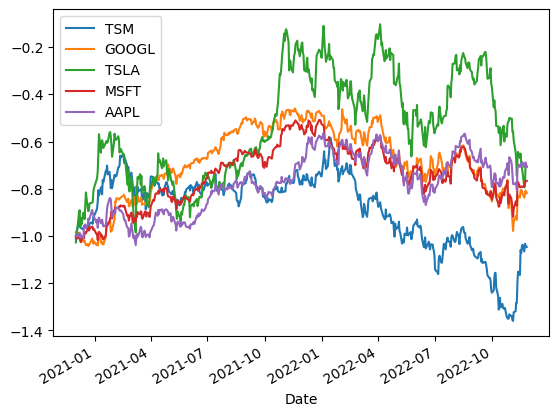

In [132]:
# print(US_STOCK_LIST)

# print(US_tickers.tickers["TSM"].history(period="1mo").head())

print(StockReturns.head())

cum_rets = StockReturns.cumsum()

print(cum_rets.head())

running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max<1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

 
# closing_price_df = closing_price_df.dropna() 


## Historical value at risk

About simple single-day movements we need to use VaR because drawdown is a measure of sustained losses over time.

Value at Risk, often referred to as VaR, is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level, but the most commonly quoted tend to be VaR(95) and VaR(99). Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that your portfolio or asset has sustained in the worst 5% of cases.

In [133]:
# Calculate historical VaR(95)

StockReturns_perc = StockReturns

print(StockReturns_perc)

# print(StockReturns_perc)
StockReturns_perc.replace([np.inf, -np.inf], np.nan, inplace=True)
StockReturns_perc = StockReturns_perc.dropna()
# print(StockReturns_perc)



                                TSM     GOOGL      TSLA      MSFT      AAPL
Date                                                                       
2020-12-02 00:00:00-05:00 -0.013087  0.016493 -0.027259 -0.003885  0.002933
2020-12-03 00:00:00-05:00 -0.000402 -0.001715  0.043177 -0.005247 -0.001138
2020-12-04 00:00:00-05:00  0.042513  0.001054  0.009539  0.000560 -0.005613
2020-12-07 00:00:00-05:00  0.025644 -0.003690  0.071314 -0.000327  0.012270
2020-12-08 00:00:00-05:00 -0.007050 -0.003137  0.012653  0.008026  0.005091
...                             ...       ...       ...       ...       ...
2022-11-18 00:00:00-05:00  0.009696 -0.009455 -0.016269 -0.001903  0.003782
2022-11-21 00:00:00-05:00 -0.028443 -0.018783 -0.068372  0.003441 -0.021680
2022-11-22 00:00:00-05:00  0.032654  0.015167  0.012152  0.012311  0.014661
2022-11-23 00:00:00-05:00 -0.006906  0.014529  0.078218  0.010407  0.005926
2022-11-25 00:00:00-05:00 -0.006954 -0.010156 -0.001856 -0.000364 -0.019594

[500 rows x

TSM
Date
2020-12-02 00:00:00-05:00   -0.013087
2020-12-03 00:00:00-05:00   -0.000402
2020-12-04 00:00:00-05:00    0.042513
2020-12-07 00:00:00-05:00    0.025644
2020-12-08 00:00:00-05:00   -0.007050
                               ...   
2022-11-18 00:00:00-05:00    0.009696
2022-11-21 00:00:00-05:00   -0.028443
2022-11-22 00:00:00-05:00    0.032654
2022-11-23 00:00:00-05:00   -0.006906
2022-11-25 00:00:00-05:00   -0.006954
Name: TSM, Length: 500, dtype: float64
var_95 = -0.03663197366814344


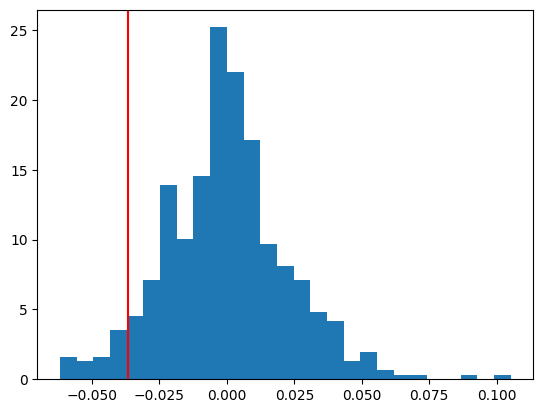

GOOGL
Date
2020-12-02 00:00:00-05:00    0.016493
2020-12-03 00:00:00-05:00   -0.001715
2020-12-04 00:00:00-05:00    0.001054
2020-12-07 00:00:00-05:00   -0.003690
2020-12-08 00:00:00-05:00   -0.003137
                               ...   
2022-11-18 00:00:00-05:00   -0.009455
2022-11-21 00:00:00-05:00   -0.018783
2022-11-22 00:00:00-05:00    0.015167
2022-11-23 00:00:00-05:00    0.014529
2022-11-25 00:00:00-05:00   -0.010156
Name: GOOGL, Length: 500, dtype: float64
var_95 = -0.03258857159491447


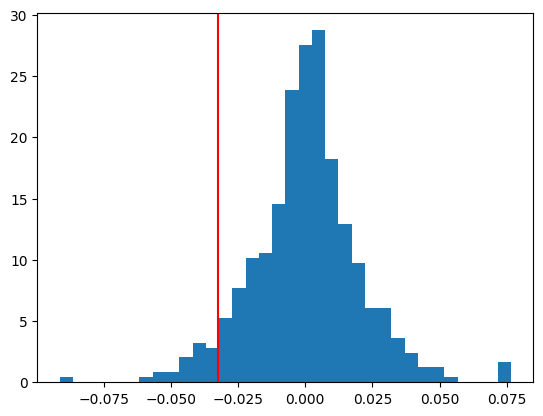

TSLA
Date
2020-12-02 00:00:00-05:00   -0.027259
2020-12-03 00:00:00-05:00    0.043177
2020-12-04 00:00:00-05:00    0.009539
2020-12-07 00:00:00-05:00    0.071314
2020-12-08 00:00:00-05:00    0.012653
                               ...   
2022-11-18 00:00:00-05:00   -0.016269
2022-11-21 00:00:00-05:00   -0.068372
2022-11-22 00:00:00-05:00    0.012152
2022-11-23 00:00:00-05:00    0.078218
2022-11-25 00:00:00-05:00   -0.001856
Name: TSLA, Length: 500, dtype: float64
var_95 = -0.06552120684857463


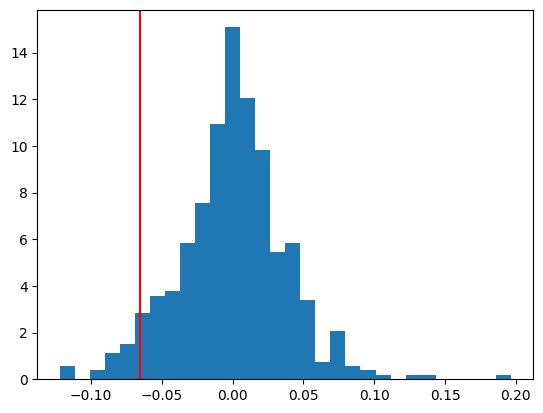

MSFT
Date
2020-12-02 00:00:00-05:00   -0.003885
2020-12-03 00:00:00-05:00   -0.005247
2020-12-04 00:00:00-05:00    0.000560
2020-12-07 00:00:00-05:00   -0.000327
2020-12-08 00:00:00-05:00    0.008026
                               ...   
2022-11-18 00:00:00-05:00   -0.001903
2022-11-21 00:00:00-05:00    0.003441
2022-11-22 00:00:00-05:00    0.012311
2022-11-23 00:00:00-05:00    0.010407
2022-11-25 00:00:00-05:00   -0.000364
Name: MSFT, Length: 500, dtype: float64
var_95 = -0.029285761395548844


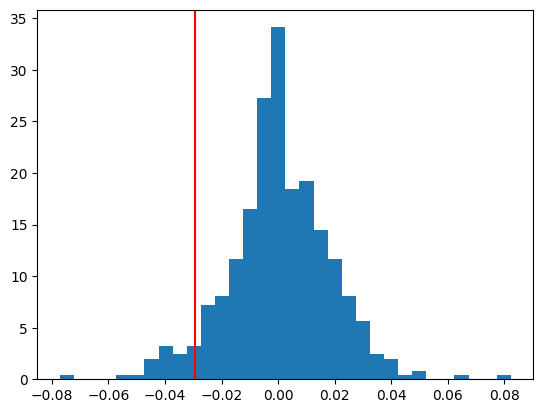

AAPL
Date
2020-12-02 00:00:00-05:00    0.002933
2020-12-03 00:00:00-05:00   -0.001138
2020-12-04 00:00:00-05:00   -0.005613
2020-12-07 00:00:00-05:00    0.012270
2020-12-08 00:00:00-05:00    0.005091
                               ...   
2022-11-18 00:00:00-05:00    0.003782
2022-11-21 00:00:00-05:00   -0.021680
2022-11-22 00:00:00-05:00    0.014661
2022-11-23 00:00:00-05:00    0.005926
2022-11-25 00:00:00-05:00   -0.019594
Name: AAPL, Length: 500, dtype: float64
var_95 = -0.03318928959338443


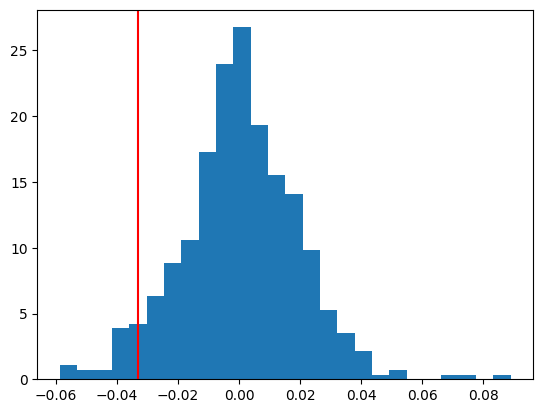

In [134]:

for col in StockReturns_perc.columns:
    print(col)
    print(StockReturns_perc[col])

    var_95 = np.percentile(StockReturns_perc[col], 100-95)
    print(f"var_95 = {var_95}")

    # Sort the returns for plotting
    sorted_rets = sorted(StockReturns_perc[col])
    # print(sorted_rets)

    # Plot the probability of each sorted return quantile
    plt.hist(sorted_rets, bins='auto',density=True,stacked=True)
    # plt.xlim(-1, 1)

    # Denote the VaR 95 quantile
    plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
    plt.show()

## Historical expected shortfall

Expected Shortfall, otherwise known as CVaR, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.

For example, if your portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

TSM
var_90 : -0.028493240293227938
cvar_90 : -0.03966339181502865
var_95 : -0.03663197366814344
cvar_95 : -0.047244936054079784
var_99 : -0.055166320163960995
cvar_99 : -0.05908212108159292


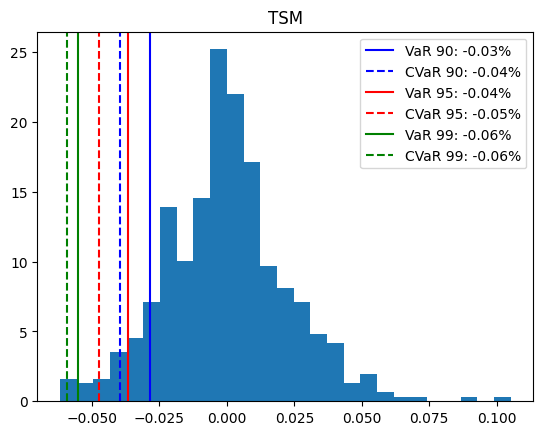

GOOGL
var_90 : -0.024664968832257005
cvar_90 : -0.036072848915261045
var_95 : -0.03258857159491447
cvar_95 : -0.04395252521372612
var_99 : -0.047099710361234635
cvar_99 : -0.0620618394916415


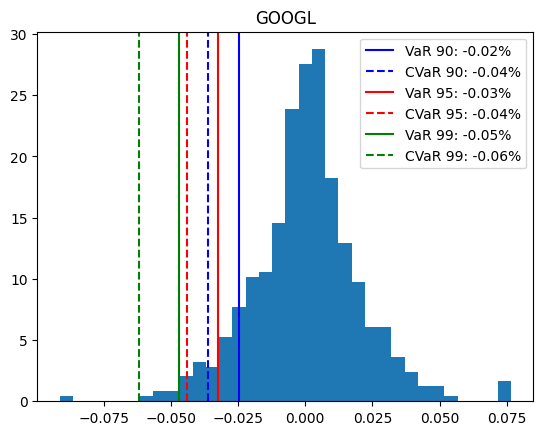

TSLA
var_90 : -0.04840301440881636
cvar_90 : -0.06809008930948988
var_95 : -0.06552120684857463
cvar_95 : -0.08092842972192221
var_99 : -0.08619101228875689
cvar_99 : -0.10804181898811163


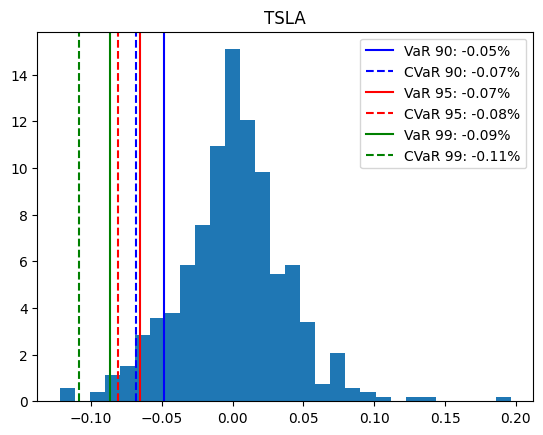

MSFT
var_90 : -0.02094938656324311
cvar_90 : -0.03327727131584777
var_95 : -0.029285761395548844
cvar_95 : -0.04064364014011411
var_99 : -0.043564845073314304
cvar_99 : -0.05461615907237014


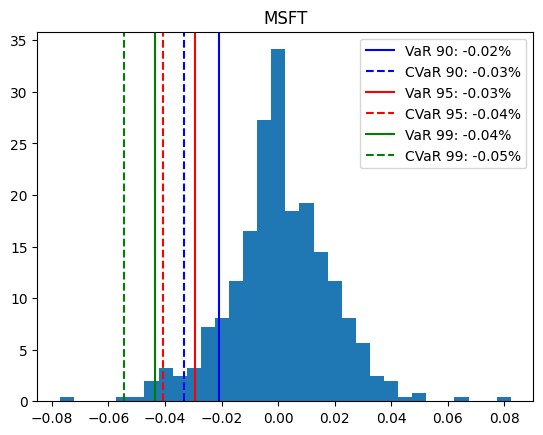

AAPL
var_90 : -0.023812025853834105
cvar_90 : -0.03414811291940178
var_95 : -0.03318928959338443
cvar_95 : -0.040607211508687076
var_99 : -0.042472066115895886
cvar_99 : -0.054355028414598314


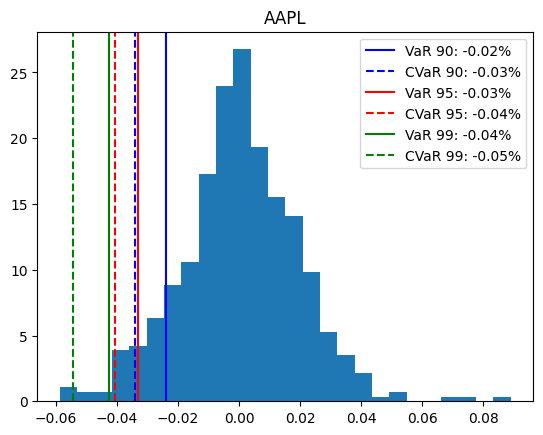

In [135]:

for col in StockReturns_perc.columns:
    print(col)

    # Var_90------------------------------------------
    var_90 = np.percentile(StockReturns_perc[col], 100-90)
    print(f"var_90 : {var_90}")

    # Historical CVaR 90
    cvar_90 = StockReturns_perc[col][StockReturns_perc[col] <= var_90].mean()
    print(f"cvar_90 : {cvar_90}")

    # Var_95------------------------------------------
    var_95 = np.percentile(StockReturns_perc[col], 100-95)
    print(f"var_95 : {var_95}")

    # Historical CVaR 95
    cvar_95 = StockReturns_perc[col][StockReturns_perc[col] <= var_95].mean()
    print(f"cvar_95 : {cvar_95}")

    # Var_99------------------------------------------
    var_99 = np.percentile(StockReturns_perc[col], 100-99)
    print(f"var_99 : {var_99}")

    # Historical CVaR 99
    cvar_99 = StockReturns_perc[col][StockReturns_perc[col] <= var_99].mean()
    print(f"cvar_99 : {cvar_99}")

    # Sort the returns for plotting
    sorted_rets = sorted(StockReturns_perc[col])

    # Plot the probability of each return quantile
    plt.hist(sorted_rets, bins='auto',density=True,stacked=True)
    # plt.xlim(-40, 40)


    # Denote the VaR 95 and CVaR 95 quantiles
    # Var_90------------------------------------------
    plt.axvline(x=var_90, color="b", linestyle="solid", label='VaR 90: {0:.2f}%'.format(var_90))
    plt.axvline(x=cvar_90, color='b', linestyle='dashed', label='CVaR 90: {0:.2f}%'.format(cvar_90))

    # Var_95------------------------------------------
    plt.axvline(x=var_95, color="r", linestyle="solid", label='VaR 95: {0:.2f}%'.format(var_95))
    plt.axvline(x=cvar_95, color='r', linestyle='dashed', label='CVaR 95: {0:.2f}%'.format(cvar_95))

    # Var_99------------------------------------------
    plt.axvline(x=var_99, color="g", linestyle="solid", label='VaR 99: {0:.2f}%'.format(var_99))
    plt.axvline(x=cvar_99, color='g', linestyle='dashed', label='CVaR 99: {0:.2f}%'.format(cvar_99))

    plt.title(col)
    plt.legend()
    plt.show()





## Parametric VaR

Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values

In [136]:
# Import norm from scipy.stats
from scipy.stats import norm

for col in StockReturns_perc.columns:
    print(col)

    print(StockReturns[col].head())
    # Estimate the average daily return
    mu = np.mean(StockReturns[col])

    # Estimate the daily volatility => also = Standard Deviation
    vol = np.std(StockReturns[col])

    # Set the VaR confidence level
    confidence_level = 0.05

    # Calculate Parametric VaR
    var_95 = norm.ppf(confidence_level,mu,vol)
    print('Mean: ', str(mu), '\nVolatility(std): ', str(vol), '\nVaR(95): ', str(var_95))
    print()

TSM
Date
2020-12-02 00:00:00-05:00   -0.013087
2020-12-03 00:00:00-05:00   -0.000402
2020-12-04 00:00:00-05:00    0.042513
2020-12-07 00:00:00-05:00    0.025644
2020-12-08 00:00:00-05:00   -0.007050
Name: TSM, dtype: float64
Mean:  -9.319133936197832e-05 
Volatility(std):  0.02302823642139282 
VaR(95):  -0.03797126953938596

GOOGL
Date
2020-12-02 00:00:00-05:00    0.016493
2020-12-03 00:00:00-05:00   -0.001715
2020-12-04 00:00:00-05:00    0.001054
2020-12-07 00:00:00-05:00   -0.003690
2020-12-08 00:00:00-05:00   -0.003137
Name: GOOGL, dtype: float64
Mean:  0.00036443310792134097 
Volatility(std):  0.020004728985314708 
VaR(95):  -0.03254041791975481

TSLA
Date
2020-12-02 00:00:00-05:00   -0.027259
2020-12-03 00:00:00-05:00    0.043177
2020-12-04 00:00:00-05:00    0.009539
2020-12-07 00:00:00-05:00    0.071314
2020-12-08 00:00:00-05:00    0.012653
Name: TSLA, dtype: float64
Mean:  0.0005888618040042626 
Volatility(std):  0.03790632827509852 
VaR(95):  -0.06176149974370471

MSFT
Date
202

## Scaling risk estimates

The VaR(95) number calculated in previous exercises is simply the value at risk for a single day. To estimate the VaR for a longer time horizon, scale the value by the square root of time, similar to scaling volatility:

### $VaR(95)_{t \space days} = VaR(95)_{1 \space day} * \sqrt{t}$

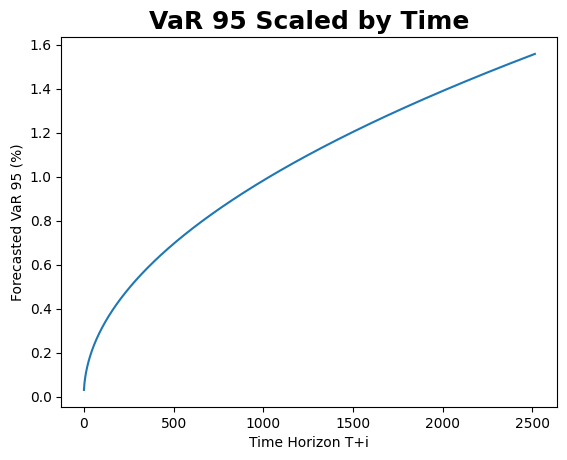

In [137]:
# Aggregate forecasted VaR
forecasted_values = np.empty([2516, 2])

def plot_var_scale():
    # Plot the forecased vs time
    plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
    plt.xlabel('Time Horizon T+i')
    plt.ylabel('Forecasted VaR 95 (%)')
    plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
    plt.show()


# Loop through each forecast period
for i in range(0,2516):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95*np.sqrt(i+1)
    

# Plot the results
plot_var_scale()

## A random walk simulation

Stochastic or random movements are used in physics to represent particle and fluid movements, in mathematics to describe fractal behavior, and in finance to describe stock market movements.



TSM


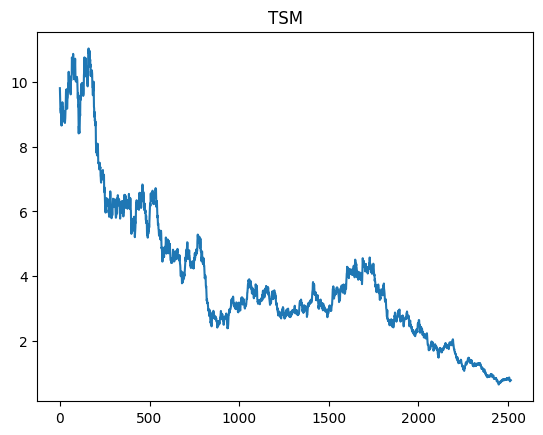

GOOGL


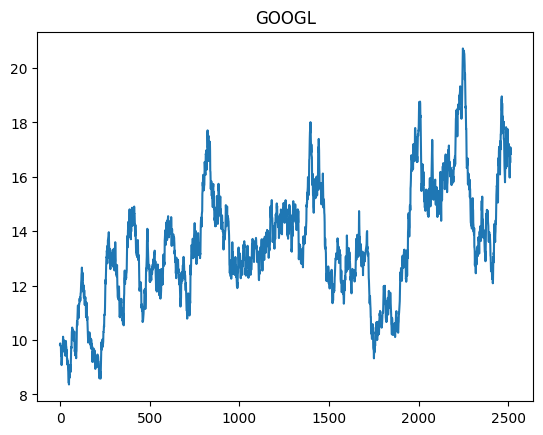

TSLA


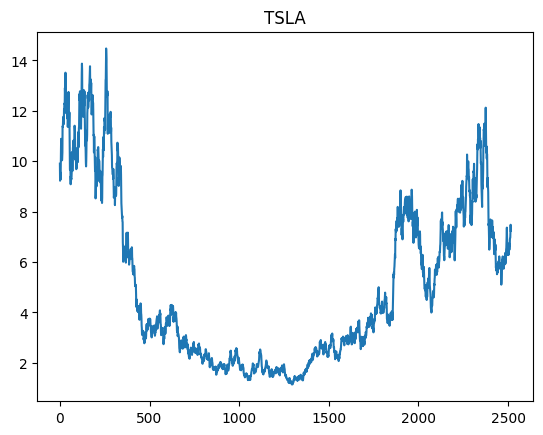

MSFT


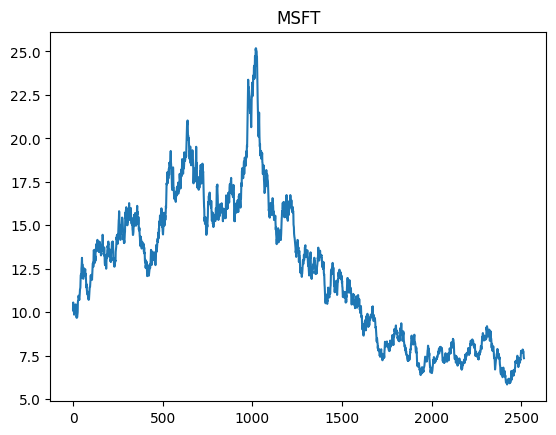

AAPL


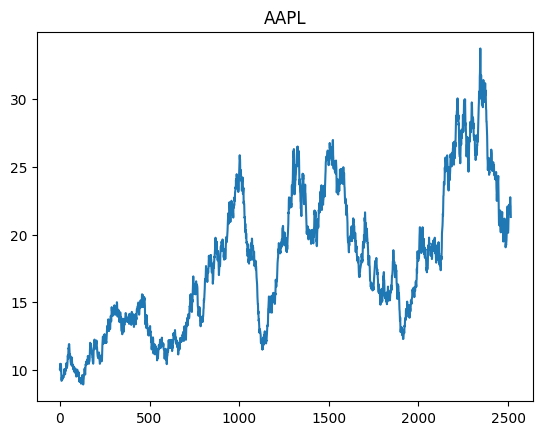

In [138]:
for col in StockReturns_perc.columns:
    print(col)
    # Set the simulation parameters
    mu = np.mean(StockReturns[col])
    vol = np.std(StockReturns[col])
    T = 2516
    S0 = 10

    # Add one to the random returns
    rand_rets = np.random.normal(mu,vol,T) + 1

    # Forecasted random walk
    forecasted_values = S0*(rand_rets.cumprod())

    # Plot the random walk
    plt.plot(range(0, T), forecasted_values)
    plt.title(col)
    plt.show()

## Monte Carlo simulations

Monte-Carlo simulations are used to model a wide range of possibilities.

Monte-Carlos can be constructed in many different ways, but all of them involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.



TSM


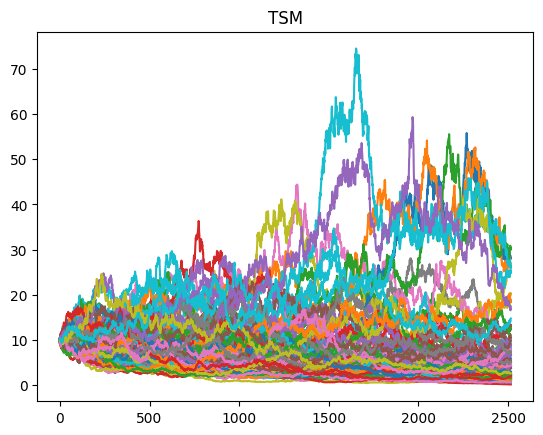

GOOGL


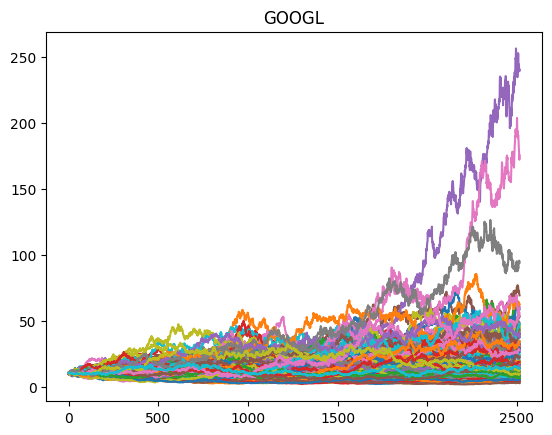

TSLA


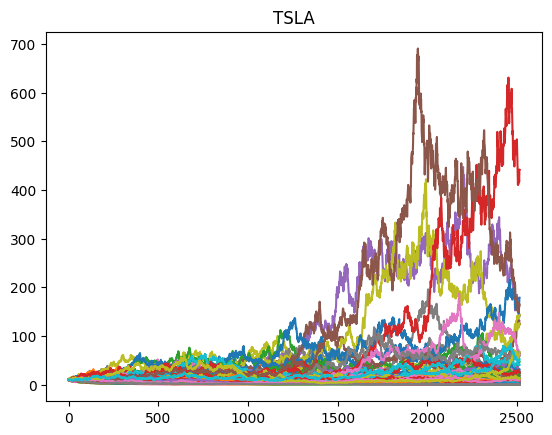

MSFT


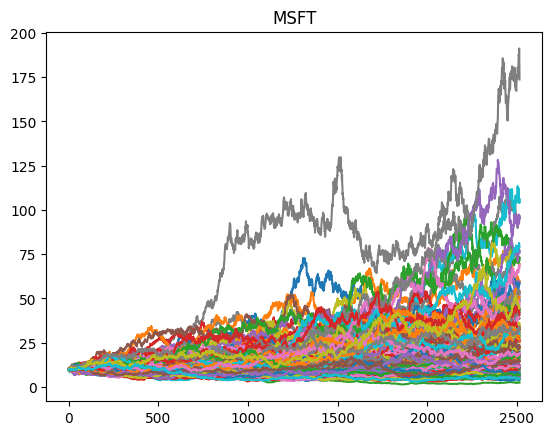

AAPL


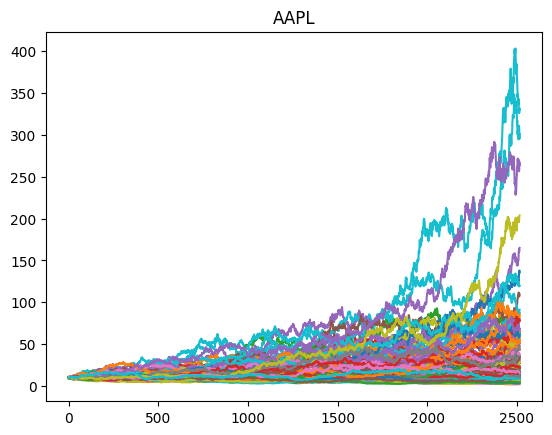

In [139]:
for col in StockReturns_perc.columns:
    print(col)
    # Set the simulation parameters
    mu = np.mean(StockReturns[col])
    vol = np.std(StockReturns[col])
    T = 2516
    S0 = 10

    for i in range(0,100):

        # Generate the random returns
        rand_rets = np.random.normal(mu, vol, T) + 1
        
        # Create the Monte carlo path
        forecasted_values = S0*(rand_rets).cumprod()
        
        # Plot the Monte Carlo path
        plt.plot(range(T), forecasted_values)

    plt.title(col)
    plt.show()

## Monte Carlo VaR

Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

Aggregate the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).

In [140]:
for col in StockReturns_perc.columns:
    print(col)
    # Set the simulation parameters
    mu = np.mean(StockReturns[col])
    vol = np.std(StockReturns[col])
    T = 2516
    S0 = 10



    for i in range(0,100):

        sim_returns = []

        # Generate the random returns
        rand_rets = np.random.normal(mu, vol, T) 

        sim_returns.append(rand_rets)
        
    # Calculate the VaR(99)
    var_99 = np.percentile(sim_returns,1)   
    print("Parametric VaR(99): ", round(100*var_99, 2),"%")


TSM
Parametric VaR(99):  -5.27 %
GOOGL
Parametric VaR(99):  -4.61 %
TSLA
Parametric VaR(99):  -8.78 %
MSFT
Parametric VaR(99):  -4.06 %
AAPL
Parametric VaR(99):  -4.55 %
